In [26]:
import inspire_agrivolt
from glob import glob
import xarray as xr
import pathlib
import subprocess

from pathlib import Path
import pvdeg

In [45]:
MODEL_OUT_PATH = Path('/projects/inspire/PySAM-MAPS/v1/colorado/02')
MODEL_OUT_ZARRS = list(MODEL_OUT_PATH.glob("*.zarr"))

zarrs = [xr.open_zarr(str(path)) for path in MODEL_OUT_ZARRS]
joined = xr.concat(zarrs, dim="gid").sortby("gid")

joined

<xarray.Dataset> Size: 27GB
Dimensions:              (gid: 17508, time: 8760, distance: 10)
Coordinates:
  * distance             (distance) int64 80B 0 1 2 3 4 5 6 7 8 9
  * gid                  (gid) int64 140kB 389874 389875 ... 560851 560852
  * time                 (time) datetime64[ns] 70kB 2001-01-01 ... 2001-12-31...
Data variables: (12/17)
    albedo               (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    annual_energy        (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    annual_poa           (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    dhi                  (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    dni                  (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    ghi                  (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    ...                   ...
    subarray1_poa_front  (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    subarray1_poa_rear   (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    temp_air             (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    tilt                 (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    wind_direction       (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    wind_speed           (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>

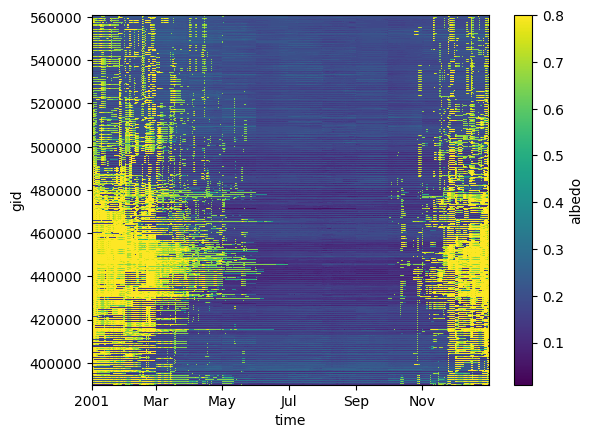

In [46]:
joined.albedo.plot()

In [40]:
gids, breakdown = inspire_agrivolt.verify.gids_with_time_nans(
    joined
)

In [41]:
breakdown

{'albedo': 0,
 'dhi': 0,
 'dni': 0,
 'ghi': 0,
 'ground_irradiance': 0,
 'relative_humidity': 0,
 'subarray1_celltemp': 0,
 'subarray1_dc_gross': 0,
 'subarray1_poa_front': 0,
 'subarray1_poa_rear': 0,
 'temp_air': 0,
 'wind_direction': 0,
 'wind_speed': 0}

In [42]:
inspire_agrivolt.verify.summarize_nans_nd(
    joined
)

### Variable: `albedo`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `annual_energy`  *(dims=['gid'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

### Variable: `annual_poa`  *(dims=['gid'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

### Variable: `dhi`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `dni`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `ghi`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `ground_irradiance`  *(dims=['gid', 'time', 'distance'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

**Along `distance`**  
- Affected: 0 (0.00%)

### Variable: `pitch`  *(dims=['gid'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

### Variable: `relative_humidity`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `subarray1_celltemp`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `subarray1_dc_gross`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `subarray1_poa_front`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `subarray1_poa_rear`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `temp_air`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `tilt`  *(dims=['gid'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

### Variable: `wind_direction`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)

### Variable: `wind_speed`  *(dims=['gid', 'time'])*
- **Total NaNs**: 0 (0.0000%)

**Along `gid`**  
- Affected: 0 (0.00%)

**Along `time`**  
- Affected: 0 (0.00%)